## Load libs


In [1]:
%config Completer.use_jedi=False

In [2]:
from fastai.vision.all import *
import pandas as pd
from pathlib import Path

import torchvision
import torchvision.transforms as T

%reload_ext autoreload
%autoreload 2

/home/ojass/anaconda3/envs/ai/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


## Import data

In [3]:
path = Path('data/nabirds/')

In [4]:
images = pd.read_csv(path/'images.txt', sep=" ", header=None, names=['file','path'])
images['cat_num'] = images['path'].str.split('/').str[0]
images.head()

,file,path,cat_num
0,0000139e-21dc-4d0c-bfe1-4cae3c85c829,0817/0000139e21dc4d0cbfe14cae3c85c829.jpg,0817
1,0000d9fc-4e02-4c06-a0af-a55cfb16b12b,0860/0000d9fc4e024c06a0afa55cfb16b12b.jpg,0860
2,00019306-9d83-4334-b255-a447742edce3,0900/000193069d834334b255a447742edce3.jpg,0900
3,0001afd4-99a1-4a67-b940-d419413e23b3,0645/0001afd499a14a67b940d419413e23b3.jpg,0645
4,000332b8-997c-4540-9647-2f0a8495aecf,0929/000332b8997c454096472f0a8495aecf.jpg,0929


In [5]:
#import classes to get common_names
classes = pd.read_table(path/'classes.txt', delimiter=None)
classes.columns = ['code']
classes[['cat_num','common_name']] = classes['code'].str.split(" ", 1, expand=True)
classes = classes.drop(['code'], axis=1)
classes['cat_num'] = classes['cat_num'].str.zfill(4) #fill missing leading zeros
classes.head()

,cat_num,common_name
0,0001,"Ducks, Geese, and Swans"
1,0002,"Grouse, Quail, and Allies"
2,0003,Loons
3,0004,Grebes
4,0005,Storks


In [6]:
#merge common_name from classes into images df
images = pd.merge(images, classes,  how='left', on='cat_num')
images.head()

,file,path,cat_num,common_name
0,0000139e-21dc-4d0c-bfe1-4cae3c85c829,0817/0000139e21dc4d0cbfe14cae3c85c829.jpg,0817,Oak Titmouse
1,0000d9fc-4e02-4c06-a0af-a55cfb16b12b,0860/0000d9fc4e024c06a0afa55cfb16b12b.jpg,0860,Ovenbird
2,00019306-9d83-4334-b255-a447742edce3,0900/000193069d834334b255a447742edce3.jpg,0900,Savannah Sparrow
3,0001afd4-99a1-4a67-b940-d419413e23b3,0645/0001afd499a14a67b940d419413e23b3.jpg,0645,Eared Grebe (Nonbreeding/juvenile)
4,000332b8-997c-4540-9647-2f0a8495aecf,0929/000332b8997c454096472f0a8495aecf.jpg,0929,Eastern Phoebe


In [7]:
#import train_test_split and merge with images to get the train_test split provided with dataset
split = pd.read_csv(path/'train_test_split.txt', sep=" ", header=None, names=['file','train_test'])
images = pd.merge(images, split,  how='left', on='file')
images.head()

,file,path,cat_num,common_name,train_test
0,0000139e-21dc-4d0c-bfe1-4cae3c85c829,0817/0000139e21dc4d0cbfe14cae3c85c829.jpg,0817,Oak Titmouse,0
1,0000d9fc-4e02-4c06-a0af-a55cfb16b12b,0860/0000d9fc4e024c06a0afa55cfb16b12b.jpg,0860,Ovenbird,0
2,00019306-9d83-4334-b255-a447742edce3,0900/000193069d834334b255a447742edce3.jpg,0900,Savannah Sparrow,0
3,0001afd4-99a1-4a67-b940-d419413e23b3,0645/0001afd499a14a67b940d419413e23b3.jpg,0645,Eared Grebe (Nonbreeding/juvenile),1
4,000332b8-997c-4540-9647-2f0a8495aecf,0929/000332b8997c454096472f0a8495aecf.jpg,0929,Eastern Phoebe,0


In [8]:
images[images['train_test'] == 0]

,file,path,cat_num,common_name,train_test
0,0000139e-21dc-4d0c-bfe1-4cae3c85c829,0817/0000139e21dc4d0cbfe14cae3c85c829.jpg,0817,Oak Titmouse,0
1,0000d9fc-4e02-4c06-a0af-a55cfb16b12b,0860/0000d9fc4e024c06a0afa55cfb16b12b.jpg,0860,Ovenbird,0
2,00019306-9d83-4334-b255-a447742edce3,0900/000193069d834334b255a447742edce3.jpg,0900,Savannah Sparrow,0
4,000332b8-997c-4540-9647-2f0a8495aecf,0929/000332b8997c454096472f0a8495aecf.jpg,0929,Eastern Phoebe,0
5,000343bd-5215-49ba-ab9c-7c97a70ac1a5,0652/000343bd521549baab9c7c97a70ac1a5.jpg,0652,Yellow-crowned Night-Heron (Immature),0
...,...,...,...,...,...
48548,ffebf043-8824-4f95-aa95-92a00c53a7cd,0345/ffebf04388244f95aa9592a00c53a7cd.jpg,0345,Red-necked Grebe (Breeding),0
48553,ffef9325-d321-4129-825d-2d7dddeeb824,0980/ffef9325d3214129825d2d7dddeeb824.jpg,0980,Rose-breasted Grosbeak (Female/immature male),0
48554,fff0b2c3-5ab3-4c64-b160-a77398fe5a46,0527/fff0b2c35ab34c64b160a77398fe5a46.jpg,0527,Eurasian Collared-Dove,0
48560,ffff0d87-bc84-4ef2-a47e-a4bfa48502ce,0372/ffff0d87bc844ef2a47ea4bfa48502ce.jpg,0372,Broad-billed Hummingbird (Adult Male),0


## Transforms and data loading

In [9]:
fnames = get_image_files(path/'images')
def label_func(x): 
    return classes[classes['cat_num'] == str(x.parent.name)]['common_name'].item()

In [10]:
tfms = aug_transforms()

In [11]:
dls = ImageDataLoaders.from_path_func(
    path/'images',
    fnames,
    label_func,
    valid_pct=.25,
    bs=32,
    item_tfms=[Resize(384)],
    batch_tfms=[Normalize.from_stats(*imagenet_stats), *tfms]
)

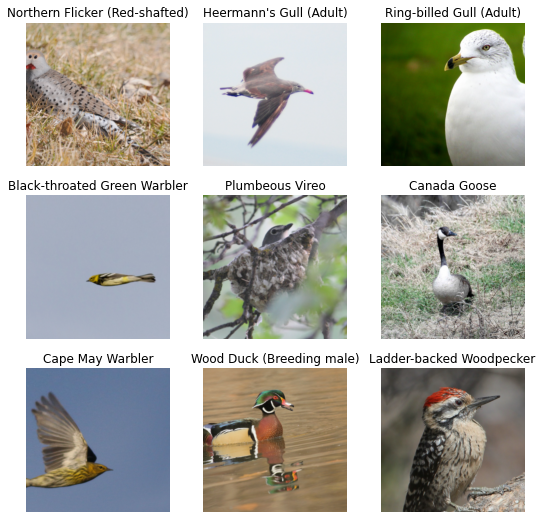

In [12]:
dls.show_batch()

In [13]:
learn = cnn_learner(dls, resnet34, metrics=[accuracy, error_rate], cbs=[MixedPrecision, FP16TestCallback])

In [14]:
learn = learn.load('stage-1-short-res34', device="cuda")

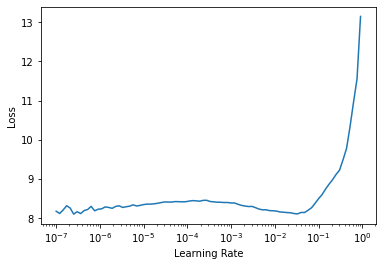

In [14]:
xs = learn.lr_find()

In [14]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.810780,1.821041,0.551977,0.448023,04:47
1,1.940255,1.313177,0.675124,0.324876,04:59


In [15]:
learn.save('stage-1-short-res34')

Path('data/nabirds/images/models/stage-1-short-res34.pth')

## GradCAM implementation

In [13]:
x, y = first(dls.valid)

In [47]:
x = x[10].unsqueeze(0)

In [14]:
class Hook_c():
    def __init__(self, m):
        self.hook = m.register_forward_hook(self.hook_func)   
    def hook_func(self, m, i, o): self.stored = o.detach().clone()
    def __enter__(self, *args): return self
    def __exit__(self, *args): self.hook.remove()

In [15]:
class HookBwd():
    def __init__(self, m):
        self.hook = m.register_backward_hook(self.hook_func)   
    def hook_func(self, m, gi, go): self.stored = go[0].detach().clone()
    def __enter__(self, *args): return self
    def __exit__(self, *args): self.hook.remove()

In [16]:
cls = 1
with HookBwd(learn.model[0]) as hookg:
    with Hook_c(learn.model[0]) as hook:
        output = learn.model.eval()(x.to('cpu'))
        act = hook.stored
    output[0,cls].backward()
    grad = hookg.stored

NameError: name 'learn' is not defined

In [73]:
torch.argmax(F.softmax(output, dim=-1), dim=1), y[10]

(tensor([191, 357, 320, 455,  36, 219, 131, 200, 155, 138, 374,  78, 155, 328,
          10, 363, 480, 529, 552,  17, 177, 194, 429,  36, 335, 434,  51, 478,
         165, 338, 541, 328]),
 TensorCategory(374, device='cuda:0'))

In [74]:
w = grad[0].mean(dim=[1,2], keepdim=True)
cam_map = (w * act[0]).sum(0)

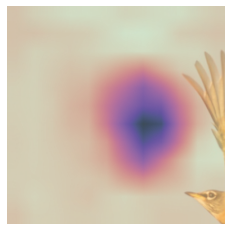

In [75]:
x_dec = TensorImage(dls.train.decode((x,))[0][0])
_,ax = plt.subplots()
x_dec.show(ctx=ax)
ax.imshow(cam_map.detach().cpu(), alpha=0.6, extent=(0,224,224,0),
              interpolation='bilinear', cmap='magma');



In [57]:
dls.vocab[374]

'Pileated Woodpecker'

In [179]:
learn.model[0][-1][-1]

Bottleneck(
  (conv1): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(512, 2048, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn3): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
)

In [16]:
learnr50 = cnn_learner(dls, resnet50, metrics=[accuracy, error_rate], cbs=[MixedPrecision])
learnr50 = learnr50.load('stage-1-short', device='cuda')

In [18]:
cls = 1
with HookBwd(learnr50.model[0]) as hookg:
    with Hook_c(learnr50.model[0]) as hook:
        output = learnr50.model.eval()(x.to('cpu'))
        act = hook.stored
    output[0,cls].backward()
    grad = hookg.stored

In [19]:
torch.argmax(F.softmax(output, dim=-1), dim=1), y

(tensor([226, 191, 219, 189, 331, 450, 406, 119, 153,  82, 438, 485, 507, 549,
          78, 189,  76, 304, 117,  37, 308, 487, 276, 536, 363,  95, 294, 191,
           2, 364, 417, 353]),
 TensorCategory([226, 191, 219, 189, 331, 450, 406, 119, 153,  82, 438, 485, 507, 549,
          78, 189,  76, 304,  31,  37, 308, 487, 276, 371, 363,  95, 517, 191,
           2, 364,  32, 353], device='cuda:0'))

In [20]:
w = grad[0].mean(dim=[1,2], keepdim=True)
cam_map = (w * act[0]).sum(0)

In [26]:
grad[0].shape, grad.shape

(torch.Size([2048, 12, 12]), torch.Size([32, 2048, 12, 12]))

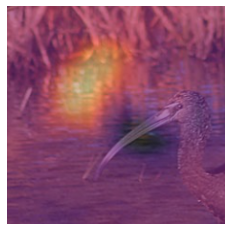

In [25]:
x_dec = TensorImage(dls.train.decode((x,))[0][0])
_,ax = plt.subplots()
x_dec.show(ctx=ax)
ax.imshow(cam_map.detach().cpu(), alpha=0.6, extent=(0,224,224,0),
              interpolation='bilinear', cmap='magma');



In [76]:
def show_cam(learn, x, y):
    cls = 1
    with HookBwd(learn.model[0]) as hookg:
        with Hook_c(learn.model[0]) as hook:
            output = learn.model.eval()(x.to('cpu'))
            act = hook.stored
        output[0,cls].backward()
        grad = hookg.stored
    w = grad[0].mean(dim=[1,2], keepdim=True)
    cam_map = (w * act[0]).sum(0)
    x_dec = TensorImage(dls.train.decode((x,))[0][0])
    _,ax = plt.subplots()
    x_dec.show(ctx=ax)
    ax.imshow(cam_map.detach().cpu(), alpha=0.6, extent=(0,224,224,0),
                  interpolation='bilinear', cmap='magma')

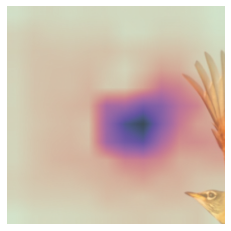

In [77]:
show_cam(learnr50, x, y)

<AxesSubplot:>

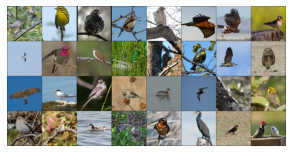

In [23]:
torchvision.utils.make_grid(dls.valid.decode((x,))[0]).show()

In [28]:
w = grad.mean(dim=[2,3], keepdim=True)
cam_map = (w * act).sum(1)

In [29]:
cam_map.shape

torch.Size([32, 12, 12])